#Machine Learning TP2 - EFREI M1


Team Members : Maxime Alves (2020090), Alix Brunet (20211029), Kevin Truong (20210400)

# Part 1: EDA, Clustering and Dimensionality reduction

import


In [1]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Exercise 1: Exploratory Data Analysis (EDA)

1. Load the dataset using pandas


In [2]:
data = fetch_openml(data_id=43582, as_frame=True)
df = data.frame

# Drop the target column "Outcome" since we are doing unsupervised learning
df = df.drop(columns=["Outcome"])

2. Display basic statistics (describe()) for all features

In [3]:
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%    

3. Visualize the data distribution of each feature (histograms)

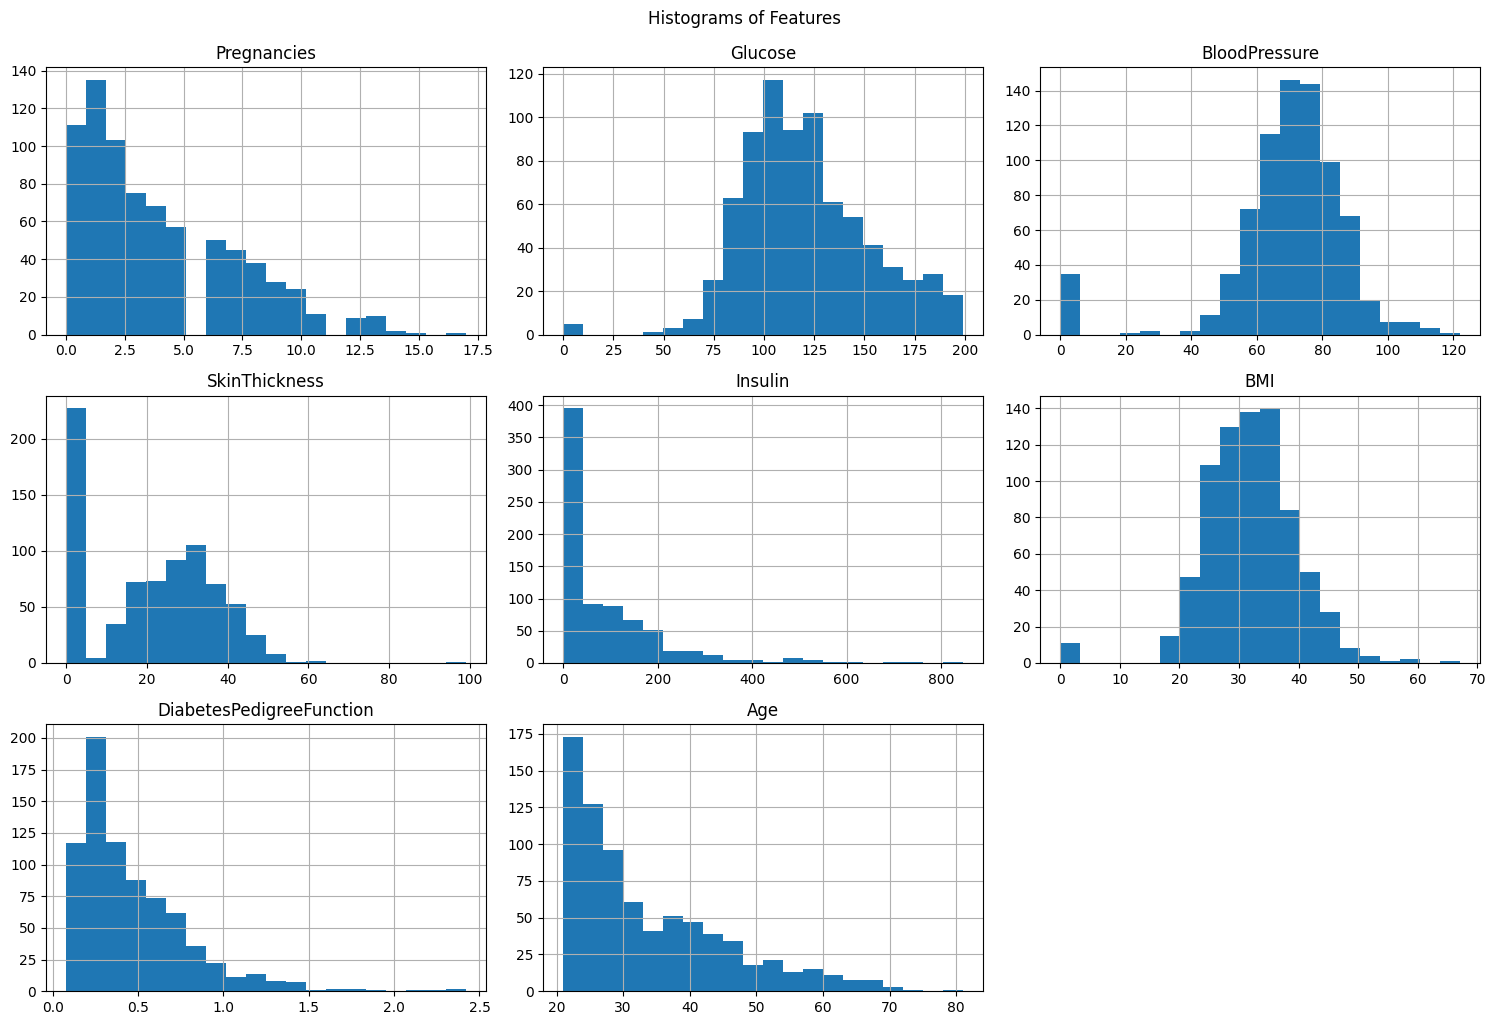

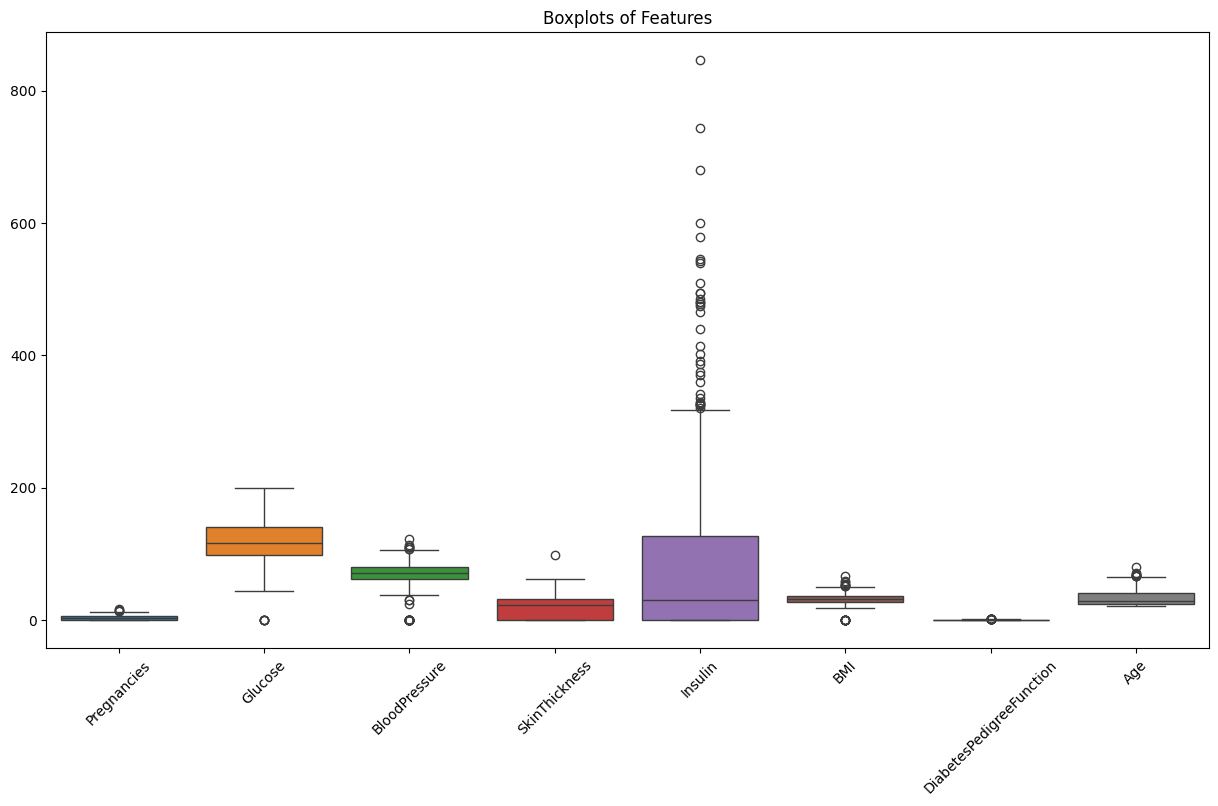

In [4]:
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.suptitle("Histograms of Features", y=1.02)
plt.show()

# Boxplots for each feature

plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplots of Features")
plt.show()

4. Check for missing data or anomalous zeros

In [5]:
zero_counts = (df == 0).sum()
zero_percent = 100 * zero_counts / len(df)
print("Percentage of zero values per column:\n", zero_percent)
print("Columns where zero values are potentially invalid")
columns_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in columns_with_zeros:
    print(f"\t{col} - zero values: {(df[col] == 0).sum()}")

Percentage of zero values per column:
 Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64
Columns where zero values are potentially invalid
	Glucose - zero values: 5
	BloodPressure - zero values: 35
	SkinThickness - zero values: 227
	Insulin - zero values: 374
	BMI - zero values: 11


5. Identify potential outliers using boxplots (IQR method)

In [6]:


# Create a dictionary to store outlier counts
outlier_counts = {}

# Loop through each column and compute outliers
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

# Print outlier counts per feature
print("Number of outliers per feature (IQR method):")
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")

Number of outliers per feature (IQR method):
Pregnancies: 4 outliers
Glucose: 5 outliers
BloodPressure: 45 outliers
SkinThickness: 1 outliers
Insulin: 34 outliers
BMI: 19 outliers
DiabetesPedigreeFunction: 29 outliers
Age: 9 outliers


6. Standardize the data using StandardScaler

In [7]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display statistics after scaling
print("Scaled Data Statistics:")
print(df_scaled.describe())

Scaled Data Statistics:
        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  7.680000e+02  7.680000e+02   7.680000e+02   7.680000e+02  7.680000e+02   
mean  -6.476301e-17 -9.251859e-18   1.503427e-17   1.006140e-16 -3.006854e-17   
std    1.000652e+00  1.000652e+00   1.000652e+00   1.000652e+00  1.000652e+00   
min   -1.141852e+00 -3.783654e+00  -3.572597e+00  -1.288212e+00 -6.928906e-01   
25%   -8.448851e-01 -6.852363e-01  -3.673367e-01  -1.288212e+00 -6.928906e-01   
50%   -2.509521e-01 -1.218877e-01   1.496408e-01   1.545332e-01 -4.280622e-01   
75%    6.399473e-01  6.057709e-01   5.632228e-01   7.190857e-01  4.120079e-01   
max    3.906578e+00  2.444478e+00   2.734528e+00   4.921866e+00  6.652839e+00   

                BMI  DiabetesPedigreeFunction           Age  
count  7.680000e+02              7.680000e+02  7.680000e+02  
mean   2.590520e-16              2.174187e-16  1.931325e-16  
std    1.000652e+00              1.000652e+00  1.000652e+00 

Exercise 2: K-Means Clustering

1. Apply K-Means clustering (with k=2) to the standardized data

In [8]:
# Set number of clusters to 2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_scaled)

# Get cluster labels
labels = kmeans.labels_

# Add labels to a copy of the original dataframe
df_with_labels = df.copy()
df_with_labels["Cluster"] = labels


2. Visualize the resulting clusters using a scatter plot (select two features)

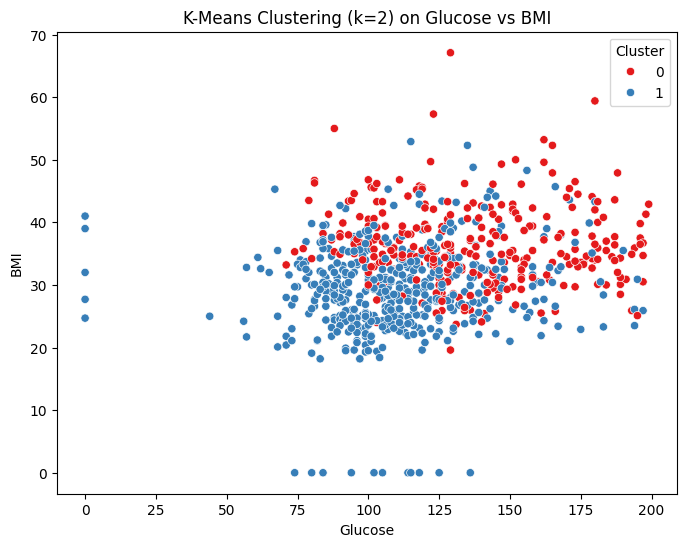

In [9]:
# Choose two features for visualization
feature_x = "Glucose"
feature_y = "BMI"

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_with_labels, x=feature_x, y=feature_y, hue="Cluster", palette="Set1")
plt.title(f"K-Means Clustering (k=2) on {feature_x} vs {feature_y}")
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend(title="Cluster")
plt.show()


 3. Interpret the results (do the clusters make sense?).

By applying K-means with k = 2, 2 clusters are visible. The red one includes individuals with high glucose and BMI value. The blue cluster include individuals with generally lower levels of both features. The glucose axis is the clearest separation. Some overlap persists, especially around intermediate values

Exercise 3: PCA and Visualization

1. Apply PCA to reduce the dataset to 2 components

In [10]:
# Apply PCA to standardized data
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Convert to DataFrame for plotting
df_pca = pd.DataFrame(data=pca_components, columns=["PC1", "PC2"])
df_pca["Cluster"] = labels  #define in ex2

2. Display the explained variance ratio for each principal component

In [11]:
# 2. Display the explained variance ratio for each principal component
print("Explained variance ratio:")
print(pca.explained_variance_ratio_)

Explained variance ratio:
[0.26179749 0.21640127]


3. Plot the data points using the first 2 principal components

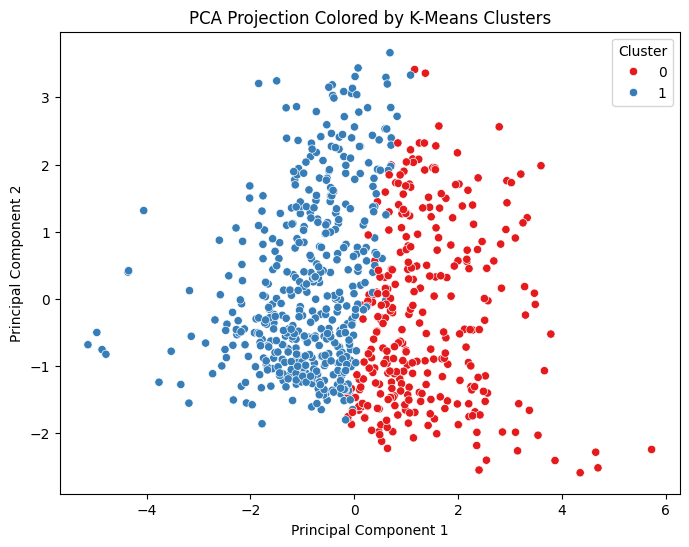

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster", palette="Set1")
plt.title("PCA Projection Colored by K-Means Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

5. Which features contribute most to PC1 and PC2?


*   PC1 : Glucose, Age and BMI
*   PC2 : DiabetesPedigreeFunction, Insulin and SkinThickness



6. Inspect the PCA loadings (components)

In [13]:
pca_loadings = pd.DataFrame(pca.components_, columns=df.columns, index=["PC1", "PC2"])
print("PCA Loadings (Component Weights):")
print(pca_loadings)

# To see the top contributing features
print("\nTop contributing features to PC1:")
print(pca_loadings.loc["PC1"].abs().sort_values(ascending=False))

print("\nTop contributing features to PC2:")
print(pca_loadings.loc["PC2"].abs().sort_values(ascending=False))

PCA Loadings (Component Weights):
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
PC1     0.128432  0.393083       0.360003       0.439824  0.435026  0.451941   
PC2     0.593786  0.174029       0.183892      -0.331965 -0.250781 -0.100960   

     DiabetesPedigreeFunction       Age  
PC1                  0.270611  0.198027  
PC2                 -0.122069  0.620589  

Top contributing features to PC1:
BMI                         0.451941
SkinThickness               0.439824
Insulin                     0.435026
Glucose                     0.393083
BloodPressure               0.360003
DiabetesPedigreeFunction    0.270611
Age                         0.198027
Pregnancies                 0.128432
Name: PC1, dtype: float64

Top contributing features to PC2:
Age                         0.620589
Pregnancies                 0.593786
SkinThickness               0.331965
Insulin                     0.250781
BloodPressure               0.183892
Glucose               

Exercise 4 : K-Means on PCA-transformed data

1. Apply K-Means clustering on PCA-transformed data (2D)

In [14]:
kmeans_pca = KMeans(n_clusters=2, random_state=42)
kmeans_pca.fit(df_pca[["PC1", "PC2"]])

# Get the new cluster labels
pca_labels = kmeans_pca.labels_

# Add to the PCA DataFrame
df_pca["PCA_Cluster"] = pca_labels

2. Compare clusters obtained in Exercise 2 vs. this one (on PCA-reduced data)

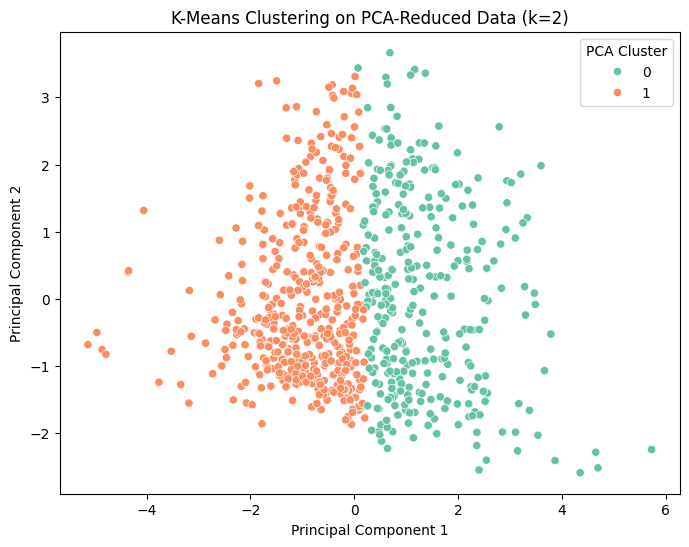

In [15]:
# Plot with PCA-based clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="PCA_Cluster", palette="Set2")
plt.title("K-Means Clustering on PCA-Reduced Data (k=2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="PCA Cluster")
plt.show()

3. Discuss the advantages or drawbacks of clustering in the original space vs. PCA space.

 In the PCA-transformed space, the two clusters are much more distinctly separated, particularly along the first principal component. The decision boundary appears almost perfectly vertical and linear, indicating that this component captures the most critical variance needed to distinguish between the groups.

By contrast, in the original space ,the clusters overlapped more and were less clearly defined. This is likely due to the use of all eight original dimensions

#Discussion

When does PCA help clustering?


PCA help clustering when the original dataset include some features like redundant or highly correlated features, noisy variables, high-dimensional spaces. In this case of dataset, applying PCA helped reveal more distinct cluster by projecting the data into a 2D space.

How did scaling impact the results?


Scaling impact the results by ensuring that all features contribute equally to the analysis. Without scaling, variables like Glucose could dominate both the PCA directions and the K-Means clustering process. Thanks to StandardScaler, the data was standardized.

Are clusters meaningful in this context? How could you improve them?


The clusters are meaningful in this context not perfect because of some overlap existing between groups. We could improve them by applying different  clustering algorithms. For example : Gaussian Mixture Models.

# Part 2 :Text classification using Bag of Words, TF-IDF, Word2Vec and BERT embeddings.

Exercise 1: Text Preprocessing


Exercise 2 Bag of Words (BoW)

Exercise 3 TF-IDF

Exercice 4 Word2Vec

Exercice 5 Doc2Vec

Exercice 6 BERT Embeddings

Summary: Comparison of Models and Vectorization Techniques
